In [1]:
from osgeo import gdal
from osgeo import gdal_array

In [2]:
# BUKA CITRA

# Import the Python 3 print function

from __future__ import print_function

# Import the "gdal" submodule from within the "osgeo" module

from osgeo import gdal 

In [3]:
# Open a GDAL dataset

dataset = gdal.Open('/home/mega/Documents/tes/stack_2022.tif', gdal.GA_ReadOnly)

/home/mega/miniconda3/envs/gdal370/lib/python3.11/site-packages/osgeo/gdal.py:287: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [4]:
print(dataset)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fbcdac9fb70> >


In [5]:
# TENTANG BAND

# How many bands does this image have?

num_bands = dataset.RasterCount
print('Number of bands in image: {n}\n'.format(n=num_bands))

Number of bands in image: 4



In [6]:
# How many rows and columns?

rows = dataset.RasterYSize
cols = dataset.RasterXSize
print('Image size is: {r} rows x {c} columns\n'.format(r=rows, c=cols)) 

Image size is: 1458 rows x 2084 columns



In [7]:
# What driver was used to open the raster?

driver = dataset.GetDriver()
print('Raster driver: {d}\n'.format(d=driver.ShortName))

Raster driver: GTiff



In [15]:
# PROYEKSI

# What is the raster's projection?

proj = dataset.GetProjection()
print('Image projection:')
print(proj + '\n')  

Image projection:
PROJCS["WGS 84 / UTM zone 48S",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]



In [16]:
# Open the blue band in our image
blue = dataset.GetRasterBand(1)

print(blue)

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7fbccf578e70> >


In [17]:
# If you recall from our discussion of enumerated types, this "3" we printed has a more useful definition for us to use
datatype_name = gdal.GetDataTypeName(blue.DataType)
print('Band datatype: {dt}'.format(dt=datatype_name))

# We can also ask how much space does this datatype take up
bytes = gdal.GetDataTypeSize(blue.DataType)
print('Band datatype size: {b} bytes\n'.format(b=bytes))

Band datatype: Float32
Band datatype size: 32 bytes



In [18]:
# Import the Python 3 print function
from __future__ import print_function

# Import the "gdal" and "gdal_array" submodules from within the "osgeo" module
from osgeo import gdal
from osgeo import gdal_array

# Import the NumPy module
import numpy as np

In [19]:
image_datatype = dataset.GetRasterBand(1).DataType

image = np.zeros((dataset.RasterYSize, dataset.RasterXSize, dataset.RasterCount),
                 dtype=gdal_array.GDALTypeCodeToNumericTypeCode(image_datatype))

# Loop over all bands in dataset
for b in range(dataset.RasterCount):
    # Remember, GDAL index is on 1, but Python is on 0 -- so we add 1 for our GDAL calls
    band = dataset.GetRasterBand(b + 1)
    
    # Read in the band's data into the third dimension of our array
    image[:, :, b] = band.ReadAsArray()
    

print('Red band mean: {r}'.format(r=image[:, :, 2].mean()))
print('NIR band mean: {nir}'.format(nir=image[:, :, 3].mean()))

Red band mean: 0.05494360625743866
NIR band mean: 0.18734832108020782


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the Python 3 print function
from __future__ import print_function

# Import the "gdal" and "gdal_array" submodules from within the "osgeo" module
from osgeo import gdal
from osgeo import gdal_array

# Import the NumPy module
import numpy as np

# Open a GDAL dataset
dataset = gdal.Open('/home/mega/Documents/tes/stack_2022.tif', gdal.GA_ReadOnly)

# Allocate our array using the first band's datatype
image_datatype = dataset.GetRasterBand(1).DataType

image = np.zeros((dataset.RasterYSize, dataset.RasterXSize, dataset.RasterCount),
                 dtype=gdal_array.GDALTypeCodeToNumericTypeCode(image_datatype))

# Loop over all bands in dataset
for b in range(dataset.RasterCount):
    # Remember, GDAL index is on 1, but Python is on 0 -- so we add 1 for our GDAL calls
    band = dataset.GetRasterBand(b + 1)
    
    # Read in the band's data into the third dimension of our array
    image[:, :, b] = band.ReadAsArray()

ndvi = (image[:, :, 3] - image[:, :, 2]) / \
        (image[:, :, 3] + image[:, :, 2]).astype(np.float64)

/home/mega/miniconda3/envs/gdal370/lib/python3.11/site-packages/osgeo/gdal.py:287: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(
/tmp/ipykernel_11965/2452342469.py:28: RuntimeWarning: invalid value encountered in divide
  ndvi = (image[:, :, 3] - image[:, :, 2]) / \


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

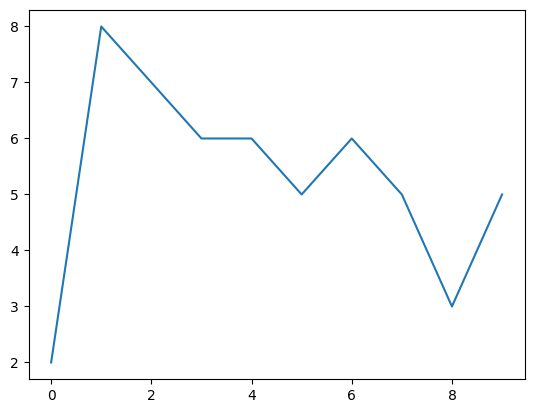

In [4]:
# Array of 0 - 9
x = np.arange(10)
# 10 random numbers, between 0 and 10
y = np.random.randint(0, 10, size=10)

# plot them as lines
plt.plot(x, y)

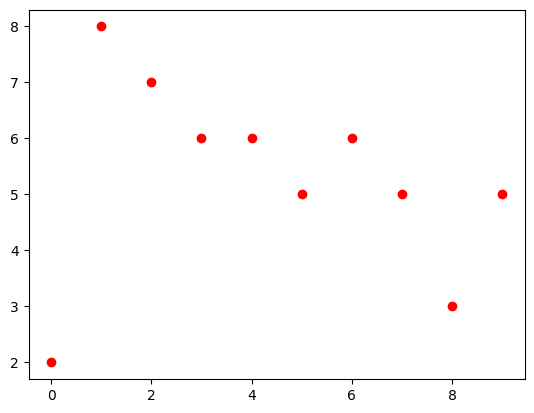

In [5]:
# plot them as just points -- specify "ls" ("linestyle") as a null string
plt.plot(x, y, 'ro', ls='')

In [6]:
print('Array shape before: {shp} (size is {sz})'.format(shp=image[:, :, 3].shape, sz=image[:, :, 3].size))

red = np.ndarray.flatten(image[:, :, 2])
nir = np.ndarray.flatten(image[:, :, 3])

print('Array shape after: {shp} (size is {sz})'.format(shp=nir.shape, sz=nir.size))

Array shape before: (1458, 2084) (size is 3038472)
Array shape after: (3038472,) (size is 3038472)


Text(0.5, 1.0, 'Tasseled Cap, eh?')

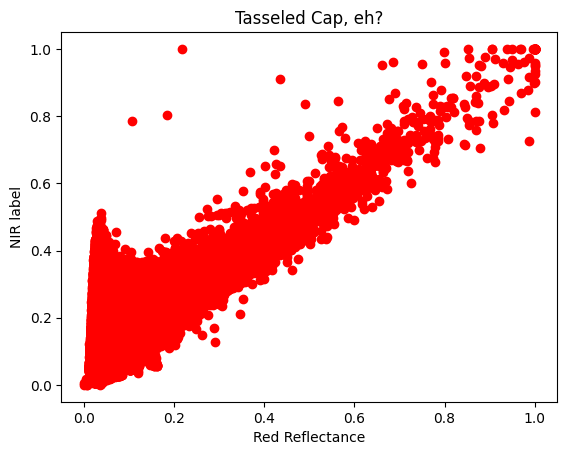

In [7]:
# Make the plot
plt.scatter(red, nir, color='r', marker='o')

# Add some axis labels
plt.xlabel('Red Reflectance')
plt.ylabel('NIR label')

# Add a title
plt.title('Tasseled Cap, eh?')

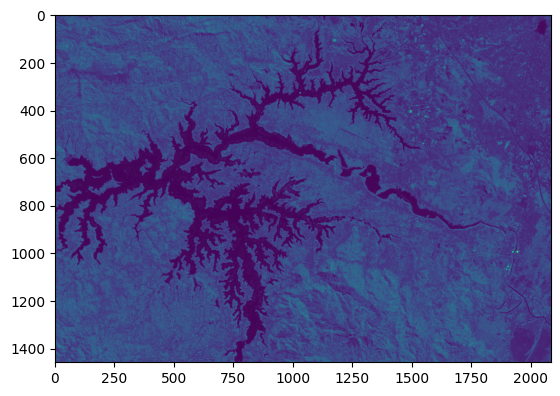

In [8]:
# use "imshow" for an image -- nir at first
plt.imshow(image[:, :, 3])

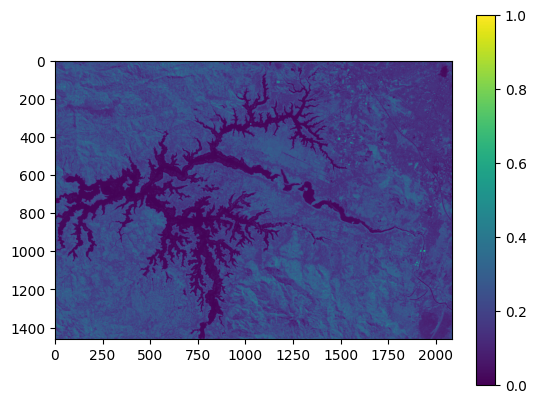

In [9]:
# use "imshow" for an image -- nir at first
plt.imshow(image[:, :, 3])
plt.colorbar()

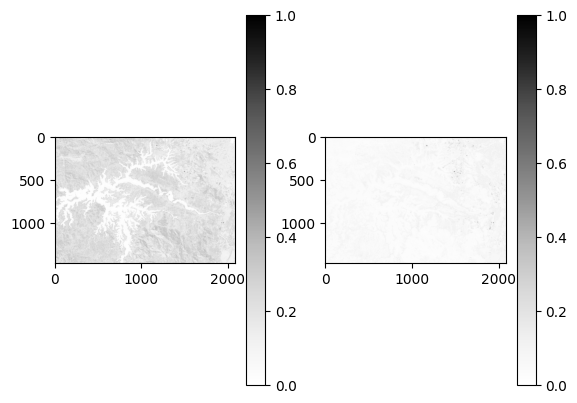

In [10]:
# use "imshow" for an image -- nir in first subplot, red in second
plt.subplot(121)
plt.imshow(image[:, :, 3], cmap=plt.cm.Greys)
plt.colorbar()

# Now red band in the second subplot (indicated by last of the 3 numbers)
plt.subplot(122)
plt.imshow(image[:, :, 2], cmap=plt.cm.Greys)
plt.colorbar()